In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
from prophet import Prophet

In [2]:
data = pd.read_csv('D:\Desktop\clean_scm.csv')

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\MU_ICT_025\AppData\Local\Temp\ipykernel_4576\3563148806.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_csv('D:\Desktop\clean_scm.csv')


In [3]:
data.head()

,Date,QTY_MT
0,01-04-2020 00:00,2.000
1,01-04-2020 00:00,11.525
2,01-04-2020 00:00,6.500
3,01-04-2020 00:00,8.125
4,01-04-2020 00:00,1.525


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    643 non-null    object 
 1   QTY_MT  643 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y %H:%M')

In [6]:
data['Month'] = data['Date'].dt.strftime('%B')

In [7]:
data['Month'] = data['Month'].astype(int)

ValueError: invalid literal for int() with base 10: 'April'

In [ ]:
result = data.groupby('Month')['QTY_MT'].sum().reset_index() 

In [ ]:
data['YearMonth'] = data['Date'].dt.strftime('%Y-%m')
result = data.groupby('YearMonth')['QTY_MT'].sum().reset_index() 

In [10]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   YearMonth  66 non-null     object 
 1   QTY_MT     66 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [11]:
result.rename(columns={'YearMonth': "ds", "QTY_MT":"y"},inplace =True)

In [12]:
result['y'] = result['y'].round(2)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
result['ds'] = pd.to_datetime(result['ds'])

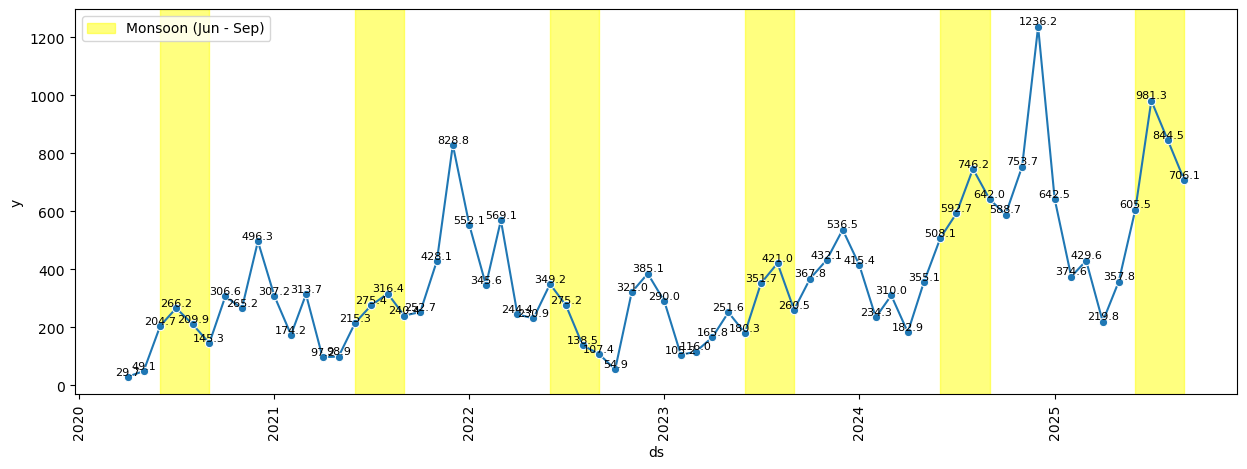

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=result, x = result['ds'], y = result['y'], marker = 'o')


# add value label in each data point 
for i, val in enumerate(result['y']):
    plt.text(
        x = result['ds'].iloc[i],
        y = val,
        s = f"{val:.1f}",
        ha='center', va='bottom',
        fontsize=8, color='black'
    )

for year in result['ds'].dt.year.unique():
    start = pd.Timestamp(f"{year}-06")
    end = pd.Timestamp(f"{year}-09")


    # Add shaded area 
    plt.axvspan(start, end, color = 'yellow', alpha = 0.5, label = 'Monsoon (Jun - Sep)'if year == result['ds'].dt.year.unique()[0] else "")
plt.xticks(rotation = 90) 
plt.legend() 
plt.show()

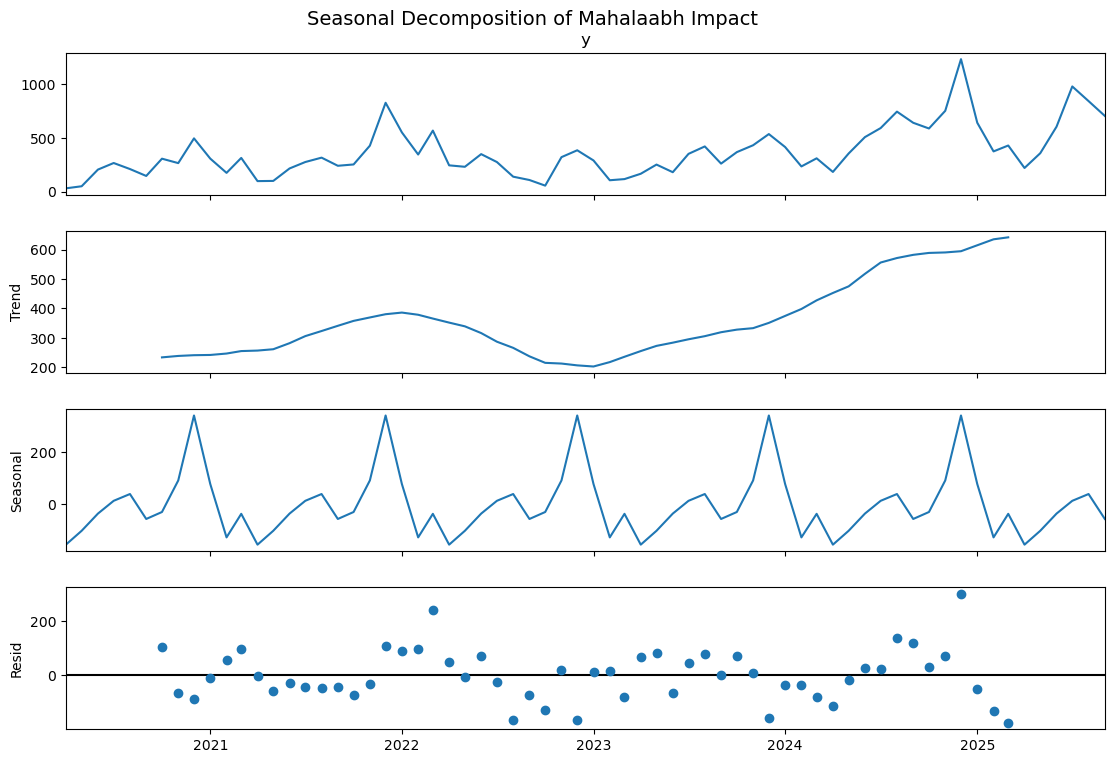

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = result.set_index('ds')

decomp = seasonal_decompose(result['y'], model = 'additive', period = 12)

fig = decomp.plot()
fig.set_size_inches(12,8)
plt.suptitle("Seasonal Decomposition of Mahalaabh Impact", fontsize=14)
plt.show()

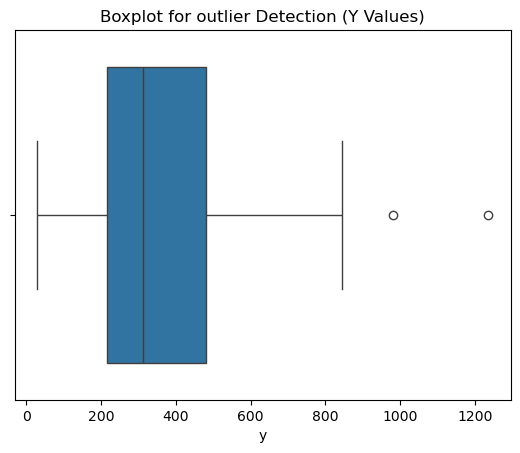

In [18]:
plt.Figure(figsize=(12,5))
sns.boxplot(x=result['y'])
plt.title("Boxplot for outlier Detection (Y Values)")
plt.show()

In [19]:
Q1 = result['y'].quantile(0.25)                                                                                                                                                                                                                                                                                                                                                            
Q3 = result['y'].quantile(0.75)                                                                                                                                                                                                                                                                                                                                                            
IQR = Q3 - Q1                                                                                                                                                                                                                                                                                                                                                            
lower_limit = Q1 - 1.5 * IQR                                                                                                                                                                                                                                                                                                                                                            
upper_limit = Q3 + 1.5 * IQR                                                                                                                                                                                                                                                                                                                                                            

outliers = result[(result['y'] < lower_limit) | (result['y'] > upper_limit)]                                                                                                                                                                                                                                                                                                                                                            
print(f"Outliers detected: {len(outliers)}")                                                                                                                                                                                                                                                                                                                                                            
outliers.head()                                                                                                                                                                                                                                                                                                                                                            

Outliers detected: 2


,y
ds,
2024-12-01,1236.21
2025-07-01,981.29


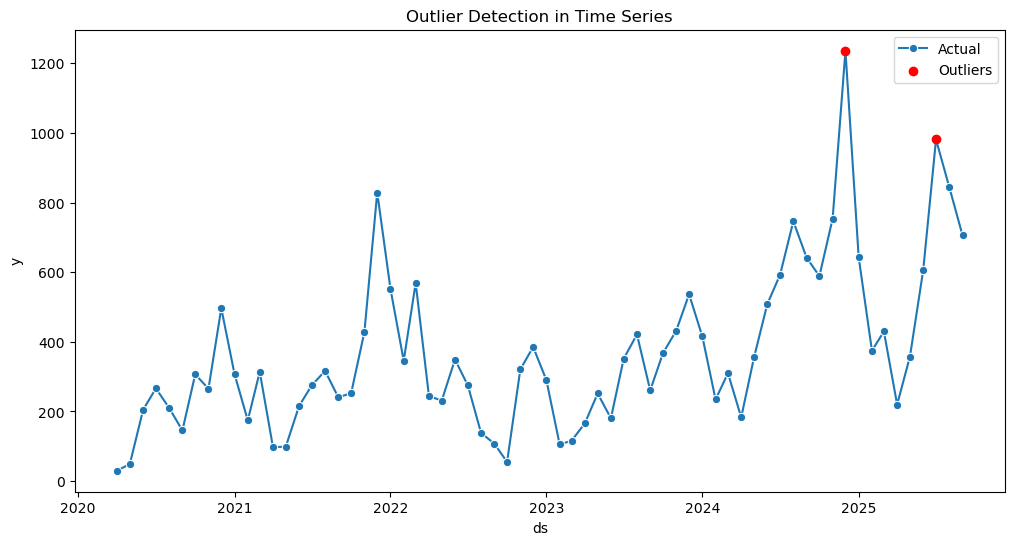

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=result, x='ds', y='y', label='Actual', marker='o')
plt.scatter(outliers.index, outliers['y'], color='red', label='Outliers', zorder=5)
plt.legend()
plt.title("Outlier Detection in Time Series")
plt.show()

In [25]:
result.reset_index(inplace=True)

In [22]:
from prophet import Prophet

In [26]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      66 non-null     datetime64[ns]
 1   y       66 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB


In [83]:
train = result.iloc[:-6]
test = result.iloc[-6:]

11:21:09 - cmdstanpy - INFO - Chain [1] start processing
11:21:10 - cmdstanpy - INFO - Chain [1] done processing
e:\Anaconda\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


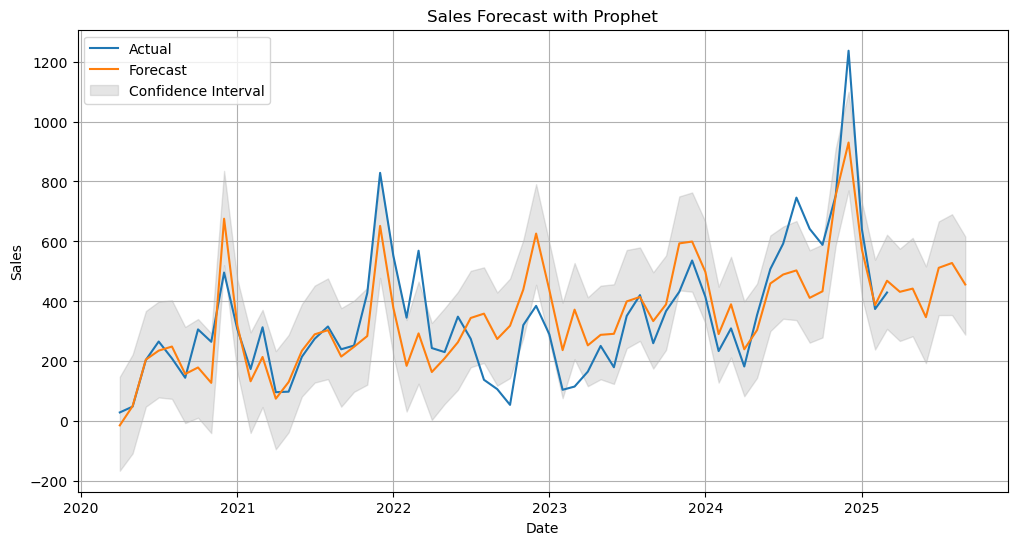

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Initialize model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=holidays

)

# 2. Fit model
model.fit(train)  # train must have columns ['ds', 'y']

# 3. Create future dataframe
future = model.make_future_dataframe(periods=6, freq="M")  # 6 months ahead

# 4. Predict
future_pred = model.predict(future)d

# 5. Plot results
plt.figure(figsize=(12, 6))

# Plot actual training data
sns.lineplot(x='ds', y='y', data=train, label='Actual')

# Plot forecast (Prophet prediction)
sns.lineplot(x='ds', y='yhat', data=future_pred, label='Forecast')

# Plot Testing Data
#sns.lineplot(x = "ds", y = 'y', data = test, label = "Test")

# Optional: Add upper and lower confidence intervals
plt.fill_between(future_pred['ds'],
                 future_pred['yhat_lower'],
                 future_pred['yhat_upper'],
                 color='gray', alpha=0.2, label='Confidence Interval')

plt.title("Sales Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.show()


In [87]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error ,mean_squared_error

pred = future_pred.tail(6)['yhat'].values
actual = test['y'].values

mae = mean_absolute_error(actual, pred)
rmse = np.sqrt(mean_squared_error(actual, pred))
mape = np.mean(np.abs((actual - pred) / actual)) * 100

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE : 265.10
RMSE: 289.12
MAPE: 47.26%


ADDING ReGRESSOR FOR MONSOON

In [ ]:
import pandas as pd

holidays = pd.DataFrame({
    'holiday': [
        'diwali', 'diwali', 'diwali',
        'holi', 'holi', 'holi',
        'eid', 'eid', 'eid',
        'independence_day', 'independence_day', 'independence_day',
        'republic_day', 'republic_day', 'republic_day'
    ],
    
    'ds': pd.to_datetime([
        '2022-10-24', '2023-11-12', '2024-11-01',   
        '2022-03-18', '2023-03-08', '2024-03-25',   
        '2022-05-03', '2023-04-22', '2024-04-10',   
        '2022-08-15', '2023-08-15', '2024-08-15',   
        '2022-01-26', '2023-01-26', '2024-01-26'    
    ]),
    'lower_window': 0,
    'upper_window': 3
})


In [77]:
df = result
df['is_winter'] = df['ds'].dt.month.isin([11,12,1]).astype(int)

In [78]:
from prophet import Prophet

model_regressor = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=holidays
)
model_regressor.add_regressor('is_winter')

model_regressor.fit(df[['ds', 'y', 'is_winter']])

11:20:05 - cmdstanpy - INFO - Chain [1] start processing
11:20:06 - cmdstanpy - INFO - Chain [1] done processing


In [79]:
future = model_regressor.make_future_dataframe(periods=6, freq='M')

# Add the same regressor pattern for future months
future['is_winter'] = future['ds'].dt.month.isin([11, 12, 1]).astype(int)

forecast = model_regressor.predict(future)


e:\Anaconda\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


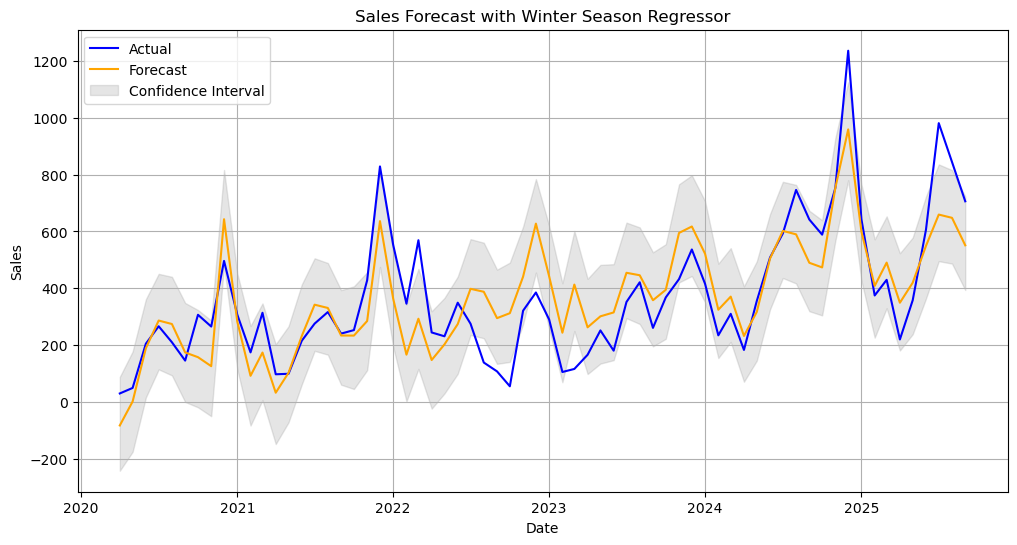

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Plot actual data
sns.lineplot(x='ds', y='y', data=df, label='Actual', color='blue')

# Plot forecast (excluding future 6 months if you want to compare to actuals)
sns.lineplot(x='ds', y='yhat', data=forecast.iloc[:-6], label='Forecast', color='orange')

# Add confidence interval
plt.fill_between(
    forecast['ds'].iloc[:-6],
    forecast['yhat_lower'].iloc[:-6],
    forecast['yhat_upper'].iloc[:-6],
    color='gray', alpha=0.2, label='Confidence Interval'
)

plt.legend()
plt.title("Sales Forecast with Winter Season Regressor")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

test = df[-6:]
pred = forecast.tail(6)['yhat'].values
actual = test['y'].values

mae = mean_absolute_error(actual, pred)
rmse = np.sqrt(mean_squared_error(actual, pred))
mape = np.mean(np.abs((actual - pred) / actual)) * 100

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")


MAE : 3077.52
RMSE: 5120.63
MAPE: 624.00%
